# Import

In [3]:
%load_ext autoreload
%autoreload 2

import fastai
from fastai import *
from fastai.vision import *
from fastai.vision.gan import *

In [4]:
fastai.__version__

'1.0.57'

# Config

In [5]:
lesson_dir_path = Path('lesson7-wgan')

In [6]:
path = '/home/justin/.fastai/data/mnist_png'

# Lesson

In [22]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
               .split_none()
               .label_from_func(noop)
               .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], size=size, tfm_y=True)
               .databunch(bs=bs)
               .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True))

In [23]:
data = get_data(128, 64)

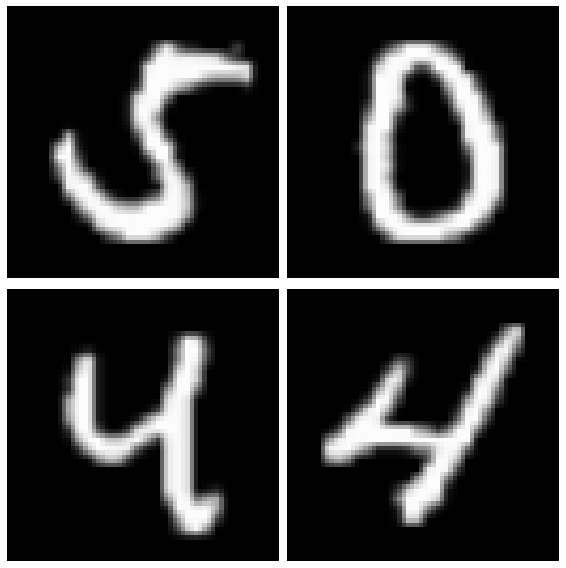

In [24]:
data.show_batch(rows=2)

In [30]:
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (in_size=64, n_channels=3, n_extra_layers=1)

In [31]:
learn = GANLearner.wgan(data, generator, critic, switch_eval=False,
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), wd=0.)

epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.119423,#na#,0.076416,-0.170585,01:16
1,-0.066921,#na#,0.082706,-0.092596,01:17
2,-0.045798,#na#,0.073679,-0.081976,01:17
3,-0.049534,#na#,0.047407,-0.065795,01:18
4,-0.007148,#na#,0.050938,-0.031519,01:18
5,-0.033920,#na#,0.027122,-0.041029,01:19
6,-0.235950,#na#,0.117877,-0.323539,01:19
7,-0.510620,#na#,0.320151,-0.705690,01:19
8,-1.118464,#na#,0.561392,-1.484612,01:19
9,-0.095566,#na#,0.203176,-0.137335,01:19


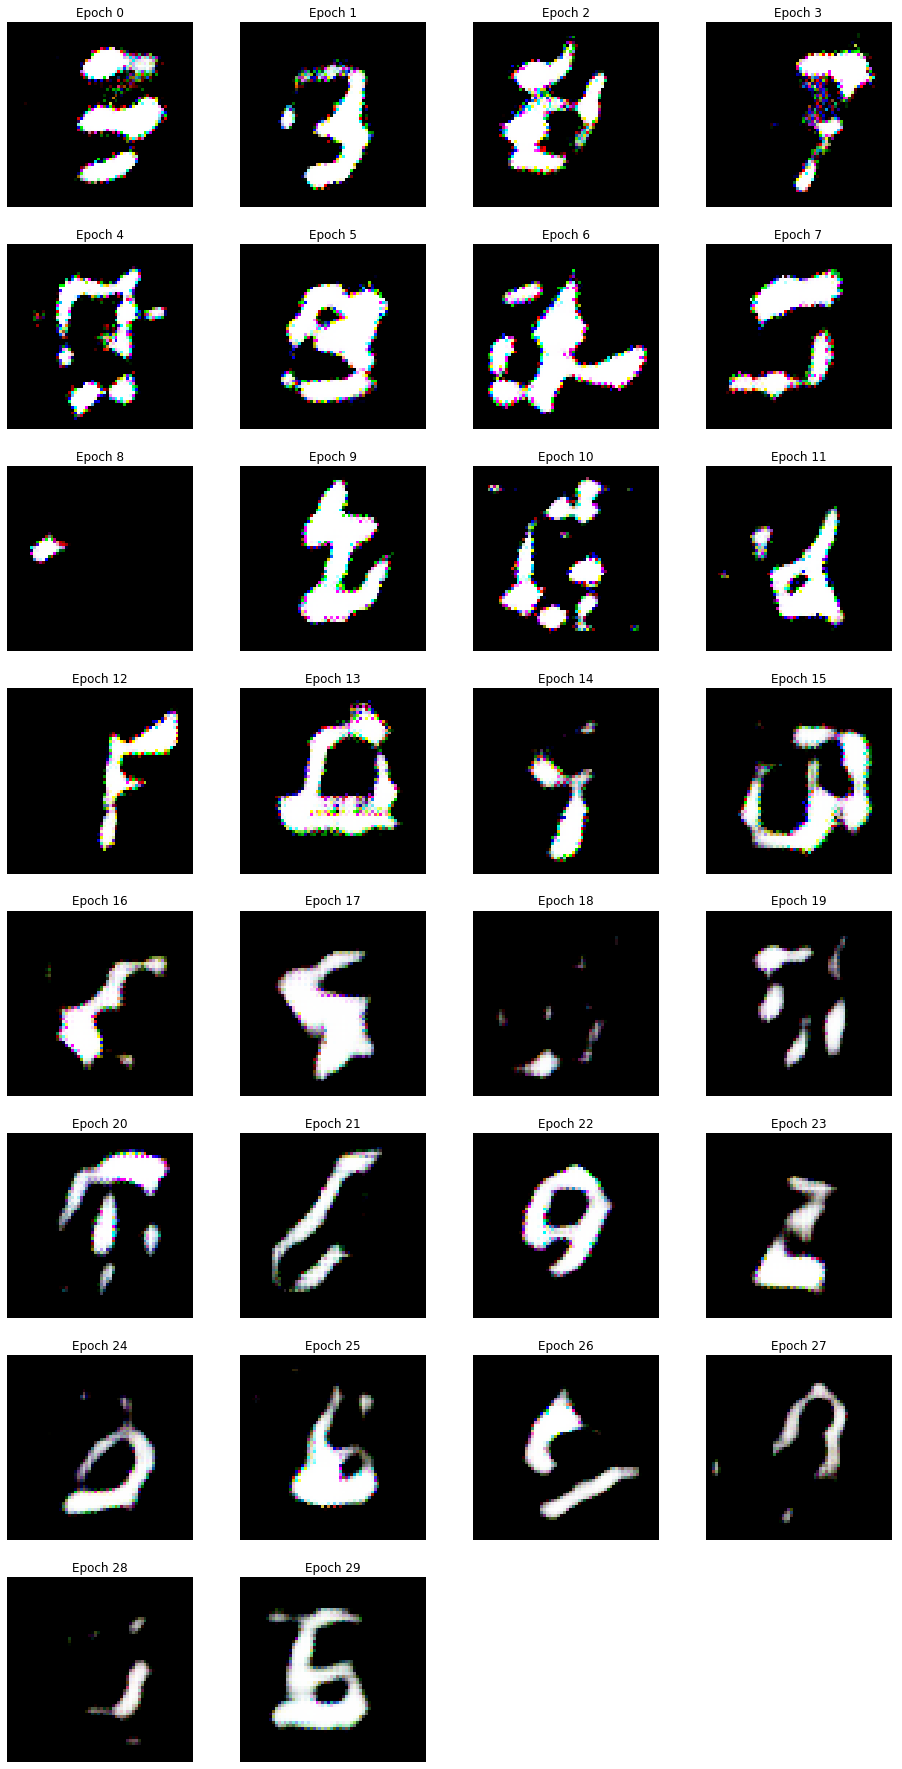

In [32]:
learn.fit(30,1e-3)

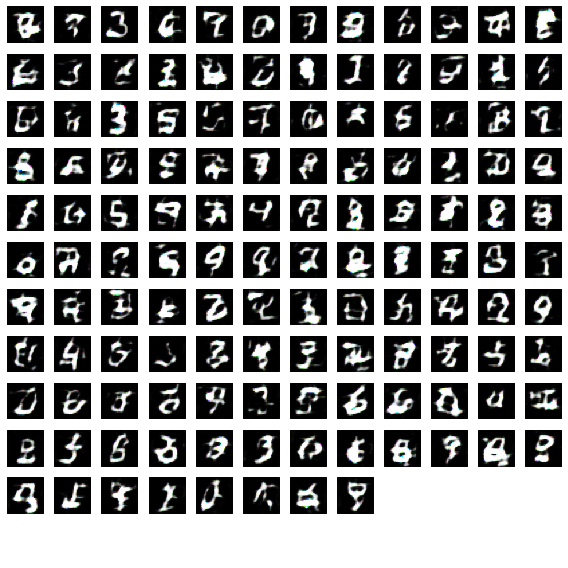

In [33]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train, rows=16, figsize=(8,8))

Looks numberish to me...